### Aufgabe 3
Schreibe eine Klasse `ImageDataset`.

Diese Klasse soll zunächst nur ein Attribut `img_paths` bekommen, welches durch eine Klassenmethode `load_paths` geschrieben wird. In der `__init__(s, base_path)` steht also:

```
def __init(s, base_path):
    s.img_paths = s.load_paths(base_path)
```

In `s.img_paths` sind Tupel gelistet, die jeweils den Pfad zu einem Bild und das zugehörige Label beinhalten.

Außerdem wird eine Klassenmethode `__getitem__(s, idx)` benötigt, welche mit Hilfe des `idx` auf oben beschriebene Liste zugreift, das Bild lädt und normalisiert und ein Tupel aus Bild und Label (als Integer Zahl) zurüc liefert.

In [2]:
import os
from utils import load_image, convert_image

In [7]:
class ImageDataset():
    def __init__(s, base_path):
        s.img_paths = s.load_paths(base_path)

    def load_paths(s, p):
        labels = [l for l in os.listdir(p) if l.isdigit()]
        images = [(p+label+"/"+f, label)  for label in labels for f in os.listdir(p+label)]
        return images
    
    def __getitem__(s, idx):
        img_p, lbl = s.img_paths[idx]
        image = load_image(img_p)
        image = convert_image(image)
        label = int(lbl)
        return image, label
    
    def __len__(s):
        return len(s.img_objects)

    def show_batch(self, b):
        img,lbl = s.__getitem__(0)
        size = int(np.sqrt(b))
        figure = plt.figure(figsize=(2*size, 2*size))
        cols, rows = 2*size, size//2
        for i in range(1, cols * rows + 1):
            sample_idx = torch.randint(len(self), size=(1,)).item()
            img, label = s.__getitem__(sample_idx)
            figure.add_subplot(rows, cols, i)
            plt.title(str(label))
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
        plt.show()

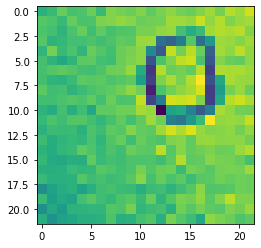

In [8]:
train_path = "./data/MYON/train/"
test_path = "./data/MYON/test/"

train_dataset = ImageDataset(train_path)
test_dataset = ImageDataset(test_path)

import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0])